# Project 04


In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
import networkx.algorithms.community as nxcom
import random
import numpy as np

In [ ]:
from google.colab import drive
drive.mount("/content/drive", force_remount=True)

g_dolphins = nx.read_gml("/content/drive/My Drive/network_science_datasets/ex4/graph_dolphins.gml")
g_facebook = nx.read_gml("/content/drive/My Drive/network_science_datasets/ex4/graph_facebook.gml")
g_karate = nx.read_gml("/content/drive/My Drive/network_science_datasets/ex4/graph_karate.gml")

def randomize_graph(gr):
  return nx.algorithms.smallworld.random_reference(gr, niter=10, connectivity=False)

g_dolphins_rnd = randomize_graph(g_dolphins)
g_facebook_rnd = randomize_graph(g_facebook)
g_karate_rnd = randomize_graph(g_karate)

Mounted at /content/drive


# Ex4.1: Community Detection

In [ ]:
def draw_communities(gr, greedy=True, node_size=100, gr_name='', randomized=False):
  if greedy:
    coms = nxcom.greedy_modularity_communities(gr)
  else:
    coms = list(nxcom.label_propagation_communities(gr))
    
  color_dict = {}
  for com in coms:
    color = tuple([random.uniform(0, 1), random.uniform(0, 1), random.uniform(0, 1)])
    for item in com:
      color_dict[item] = color
  colors = []
  for node in gr.nodes():
    colors.append(color_dict[node])

  plt.title(f"{'Randomized' if randomized else ''} {gr_name} Network: {len(coms)} {'greedy modular' if greedy else 'label propagation'} communities")
  nx.draw(gr, pos=nx.spring_layout(gr), node_color=colors, node_size=node_size)
  plt.show()

## Dolphins

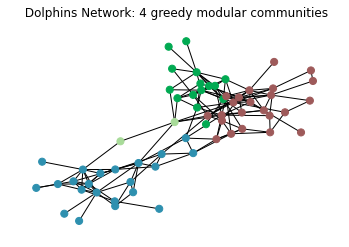

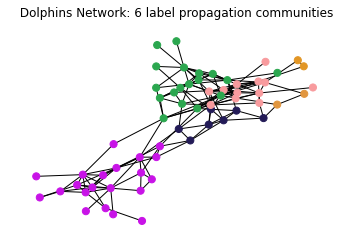

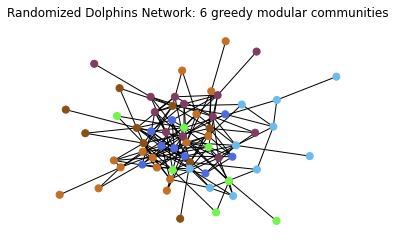

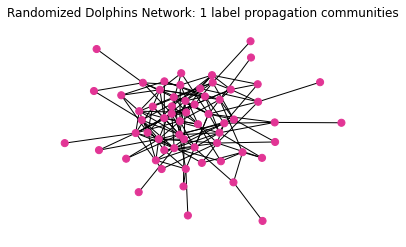

In [ ]:
draw_communities(g_dolphins, greedy=True, node_size=50, gr_name='Dolphins')
draw_communities(g_dolphins, greedy=False, node_size=50, gr_name='Dolphins')

draw_communities(g_dolphins_rnd, greedy=True, node_size=50, gr_name='Dolphins', randomized=True)
draw_communities(g_dolphins_rnd, greedy=False, node_size=50, gr_name='Dolphins', randomized=True)

## Facebook

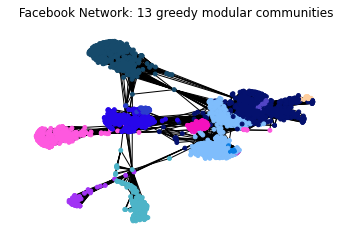

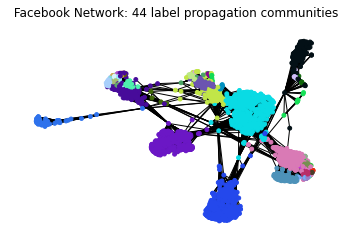

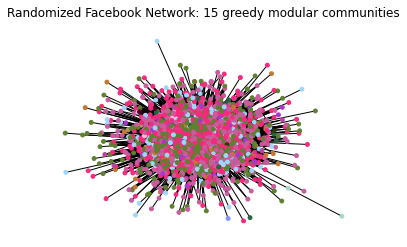

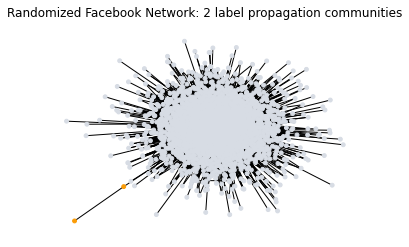

In [ ]:
draw_communities(g_facebook, greedy=True, node_size=15, gr_name='Facebook')
draw_communities(g_facebook, greedy=False, node_size=15, gr_name='Facebook')

draw_communities(g_facebook_rnd, greedy=True, node_size=15, gr_name='Facebook', randomized=True)
draw_communities(g_facebook_rnd, greedy=False, node_size=15, gr_name='Facebook', randomized=True)

## Karate

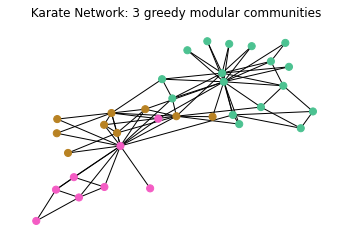

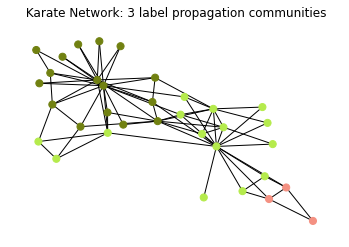

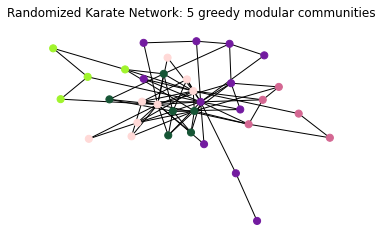

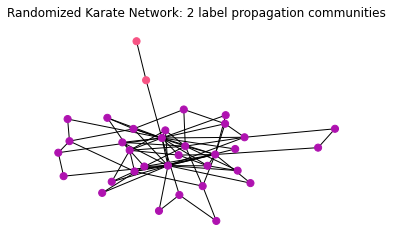

In [ ]:
draw_communities(g_karate, greedy=True, node_size=50, gr_name='Karate')
draw_communities(g_karate, greedy=False, node_size=50, gr_name='Karate')

draw_communities(g_karate_rnd, greedy=True, node_size=50, gr_name='Karate', randomized=True)
draw_communities(g_karate_rnd, greedy=False, node_size=50, gr_name='Karate', randomized=True)

## Number of communities before and after randomisation
The dolphin network has 4 greedy modular communities, respectively 6 label propagation communities in the original network. After randomisation, the network has 6 greedy modular, respectviely 1 label propagation community(ies).

The original facebook network has 13 greedy modular, respectively 44 label propagation communities. After randomization, the network has 15 greedy modular, respectively 2 label propagation communities. 

Last, the Karate network has 3 greedy modular, respectively 3 label propagation communities. After randomisation, the number of greedy modular communitites is 5 and the number of label propagation communities is 2.

In general it is visible, that after randomisation there are less label propagation communities, which is most extreme for the facebook network (decreases from 44 to 2). The number of greedy modular communities on the other hand increases in all networks after randomisation.

# Ex4.2: Random Graphs 

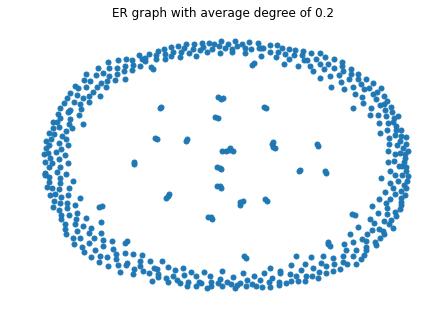

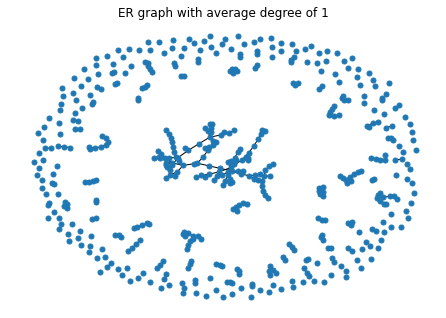

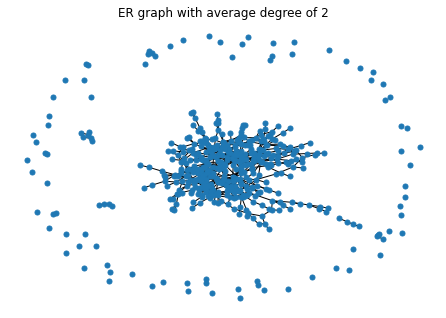

In [ ]:
def average_degree(gr):
  degrs = [x[1] for x in list(gr.degree())]
  return sum(degrs) / len(degrs)

def visualize_er_network(n=500, desired_avg_deg=0.2):
  er_graph = nx.gnm_random_graph(n, desired_avg_deg * n / 2)
  nx.draw(er_graph, pos=nx.spring_layout(er_graph), node_size=25)
  plt.title(f"ER graph with average degree of {desired_avg_deg}")
  plt.show()

visualize_er_network(n=500, desired_avg_deg=0.2)
visualize_er_network(n=500, desired_avg_deg=1)
visualize_er_network(n=500, desired_avg_deg=2)

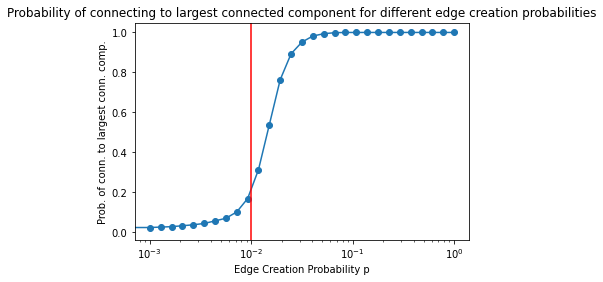

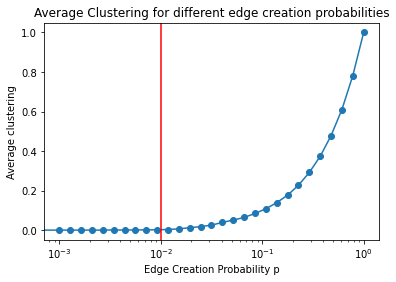

In [ ]:
def generate_er_graph_and_report_metrics(n=100, p=0):
  rand_grph = nx.erdos_renyi_graph(n, p)
  conn_cmp = list(nx.connected_components(rand_grph))
  maxcomp = max(conn_cmp, key=len)
  prob = len(maxcomp) / rand_grph.number_of_nodes()
  return nx.average_clustering(rand_grph), prob

ps = [0] + np.geomspace(0.001, 1, num=29).tolist()
ys = []
for p in ps:
  all_ys = [generate_er_graph_and_report_metrics(p=p) for _ in range(100)]
  all_avg_cls = [y[0] for y in all_ys]
  all_prob = [y[1] for y in all_ys]
  ys.append((sum(all_avg_cls) / 100, sum(all_prob) / 100))

plt.title("Probability of connecting to largest connected component for different edge creation probabilities")
plt.xscale('log')
plt.xlabel("Edge Creation Probability p")
plt.ylabel("Prob. of conn. to largest conn. comp.")
plt.plot(ps, [y[1] for y in ys], "-o") 
plt.axvline(1 / 100, 0, 1, label='Critical Probability', color='red')
plt.show()

plt.title("Average Clustering for different edge creation probabilities")
plt.xscale('log')
plt.xlabel("Edge Creation Probability p")
plt.ylabel("Average clustering")
plt.plot(ps, [y[0] for y in ys], "-o") 
plt.axvline(1 / 100, 0, 1, label='Critical Probability', color='red')
plt.show()

Whilst the average clustering continuously increases from the critical probability on, the probability of belonging to the largest connected component increases heavily between the critical point and 10^-1, afterwards plateauing on ~1. 
The shape of the "Probability of connecting to the largest connectec component" chart ressembles the shape of a sigmoid function.

It makes sense that the probability of belonging to the largest connected component starts to increase "earlier" as it is only necessary for a node to connect to one of the nodes that belong to the larget connected component, which converges towards 1 faster. 
The average clustering coefficient on the other hand takes into account all (possible) triangles and therefore grows exponentially (linear when plotted as log-log from the critical probability on). This is because it is unlikely for low rewiring probabilities to construct many triangles. As the average clustering takes into account all possible trinangles, it is only high for very high rewiring probabilities.

# Ex4.3: Small-world with high clustering

C(0): 0.5, D(0): 12.878787878787879


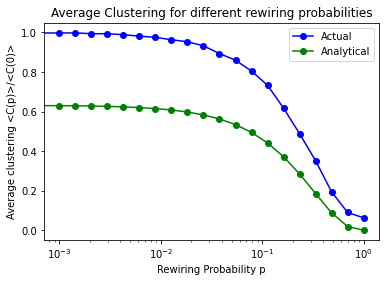

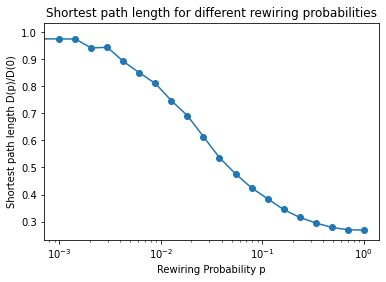

In [ ]:
## 2K=10, therefore k=5
k=5
def generate_sw_graph_and_report_metrics(n=100, p=0):
  rand_grph = nx.watts_strogatz_graph(n, k, p=p)
  c = nx.average_clustering(rand_grph)
  d = nx.average_shortest_path_length(rand_grph)
  return c, d

g_watts_0 = nx.watts_strogatz_graph(100, k, p=0)
c_0 = nx.average_clustering(g_watts_0)
d_0 = nx.average_shortest_path_length(g_watts_0)
print(f'C(0): {c_0}, D(0): {d_0}')

ps = [0] + np.geomspace(0.001, 1, num=20).tolist()
ys = []
analytical_clustering = []
for p in ps:
  all_ys = [generate_sw_graph_and_report_metrics(p=p) for _ in range(100)]
  all_c = [y[0] for y in all_ys]
  all_d = [y[1] for y in all_ys]
  ys.append((sum(all_c) / 100 / c_0, sum(all_d) / 100 / d_0))
  analytical_clustering.append(3 * (k - 1) / (2 * 2 * k - 1) * ((1 - p)**3))

plt.title("Average Clustering for different rewiring probabilities")
plt.xscale('log')
plt.xlabel("Rewiring Probability p")
plt.ylabel("Average clustering <C(p)>/<C(0)>")
plt.plot(ps, [y[0] for y in ys], '-o', color="blue", label="Actual") 
plt.plot(ps, analytical_clustering, "-o", color="green", label="Analytical") 
plt.legend()
plt.show()

plt.title("Shortest path length for different rewiring probabilities")
plt.xscale('log')
plt.xlabel("Rewiring Probability p")
plt.ylabel("Shortest path length D(p)/D(0)")
plt.plot(ps, [y[1] for y in ys], '-o') 
plt.show()



As visible from the plot, the actual average clustering does not reproduce the analytical value correctly. However, with an increasing value of the rewiring probability p, the absolute error decreases.

The shortest path on the other hand decreases with higher rewiring probability. This makes sense because for very lown rewiring probability, the network is still very similar to a lattice graph.